
 Numpy
  - Vectorization
  - Boardcast
  - Identify Matrix
  - Indexing and Slicing
  - Fancy Array
  - Reduction Operation

# Basic Section (Start)


In [1]:
import numpy as np

## Numpy (Review)

Main object type is `np.array`

Many ways to create it,

One way is to convert a python list

In [2]:
python_list = [1, 2, 3]
arr = np.array(python_list)
arr

array([1, 2, 3])

In [3]:
arr**2

array([1, 4, 9])

In [4]:
python_list**2 #__pow__

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [ ]:
# class.function(self, args) = instance.function(args)

In [6]:
# Magic Function with __XXX__
# arr.__pow__(2)
python_list.__pow__(2)

AttributeError: 'list' object has no attribute '__pow__'

Many times a list comprehension is used to create a list and then converted to a array

In [5]:
python_list_pow = [i**2 for i in python_list]  # list comprehension
python_list_pow

[1, 4, 9]

In [10]:
# Extend the behavior of built-in class use inheritance
# not directly changing it
class PowerList(list):
    def __pow__(self, exponent):
        print("I am called __pow___ for powerlist")
        if not isinstance(exponent, int):
            raise ValueError("Exponent must be an integer")
        return [i**exponent for i in self]      #you do it wrong! -cartman

my_list = PowerList()
my_list.extend([1,2,3])
print("Original list:", my_list)

powered_list = my_list ** 3
print("List to the power of 2:", powered_list)


Original list: [1, 2, 3]
I am called __pow___ for powerlist
List to the power of 2: [1, 8, 27]


### Exercise (Pre-Lec)
Create a numpy array that contain  intergers i  such that  0<i<100 and $2^i$ has the last digit 6

In [13]:
list1 = [i for i in range(1,100) if (2**i)%10 == 6]
arr1 = np.array(list1)
print(arr1)

[ 4  8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80 84 88 92 96]


Create a 2D numpy array $A$ (5,10) such that $A_{ij} = i\times j$

In [18]:
arr2 = np.arange(1,6).reshape(-1, 1) * np.arange(1, 11)
print(arr2)

[[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  4  6  8 10 12 14 16 18 20]
 [ 3  6  9 12 15 18 21 24 27 30]
 [ 4  8 12 16 20 24 28 32 36 40]
 [ 5 10 15 20 25 30 35 40 45 50]]


## Another way to create a numpy array is with initializing functions

- np.zeros
- np.ones
- np.arange

These functions along with `reshape` can be used to create initial matrix without any for loops

In [19]:
np.zeros(shape = (10, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
np.ones((10, 10)) * 2

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

In [21]:
np.arange(2, 10, 2)  # equivalent to range(2,10,2)

array([2, 4, 6, 8])

### Exercise (In Lec)

Create an array of first 10 powers of 2

In [22]:
2 ** np.arange(10)

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

### 1D vs 2D array

In [23]:
array1D = np.arange(10) * np.arange(10)
array1D = array1D.reshape(1,-1)
print(array1D.shape)
array1D

(1, 10)


array([[ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81]])

In [24]:
array2D = np.arange(10).reshape(10, 1)
print(array2D.shape)
array2D

(10, 1)


array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [25]:
array2D + array1D #boardcasting

array([[ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81],
       [ 1,  2,  5, 10, 17, 26, 37, 50, 65, 82],
       [ 2,  3,  6, 11, 18, 27, 38, 51, 66, 83],
       [ 3,  4,  7, 12, 19, 28, 39, 52, 67, 84],
       [ 4,  5,  8, 13, 20, 29, 40, 53, 68, 85],
       [ 5,  6,  9, 14, 21, 30, 41, 54, 69, 86],
       [ 6,  7, 10, 15, 22, 31, 42, 55, 70, 87],
       [ 7,  8, 11, 16, 23, 32, 43, 56, 71, 88],
       [ 8,  9, 12, 17, 24, 33, 44, 57, 72, 89],
       [ 9, 10, 13, 18, 25, 34, 45, 58, 73, 90]])

### Distinction between numpy 1D arrays and numpy 2D arrays

This tends to cause a lot of confusion for new numpy users.
Follow the below examples carefully to understand the distinction.

In [26]:
Z = np.zeros(shape=10)
print(Z)
Z.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(10,)

In [27]:
# Create 2D array by reshape
Z = np.zeros(10).reshape(10, 1)
print(Z)
Z.shape

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


(10, 1)

In [28]:
Z.squeeze()  # remove axis with length = 1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
# squeeze Remove axes of length one
Z = np.zeros(6).reshape(1, 1, 2, 3)
print(Z)
print(Z.shape, "\n")

Z_squeeze = Z.squeeze()
print(Z_squeeze)
print(Z_squeeze.shape)

[[[[0. 0. 0.]
   [0. 0. 0.]]]]
(1, 1, 2, 3) 

[[0. 0. 0.]
 [0. 0. 0.]]
(2, 3)


In [31]:
# Matrix Multiplication
Mat = np.random.randn(10, 10)
Mat.shape

array([[ 0.35434388, -0.38889209,  1.45234974,  0.53410823,  0.26808703,
         0.99028251,  1.27897055, -0.45326455,  0.36126895, -0.68289472],
       [ 0.07710743,  0.626236  , -0.06613503, -0.04681918, -2.03425687,
        -1.71797943,  0.94482451,  0.08677866,  0.51219303, -1.3552099 ],
       [-0.47566314, -0.42157816,  1.75173246, -0.63898905,  0.44173311,
         0.31718043,  1.54041369, -0.05915171, -0.40307921, -1.15151237],
       [ 0.60006057,  1.05368743,  0.40876927,  1.29736133, -0.18702093,
         1.06347997,  0.99175576,  1.34112493, -1.34780102, -0.39178931],
       [ 1.31132603, -0.99670531, -0.04479851, -0.19321347, -1.01170067,
        -0.84951105, -0.87857814,  0.79596978, -1.38413956,  0.10046944],
       [ 0.03765052,  0.64531482,  0.72186863,  0.53793348,  1.23050977,
         0.35563634,  0.95641038,  0.60946836, -1.3081413 , -1.70539573],
       [ 0.56143432,  0.35859014, -0.80521808,  0.25046014,  0.76194249,
        -0.25982446,  0.57779359, -0.01742096

In [32]:
Z = np.arange(10).reshape(10, 1)
print(Z)
print(Z.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1)


In [33]:
# (N, M) @ (M, K) = (N, K)
Mat @ Z

array([[ 11.38696329],
       [-18.19636335],
       [ -0.24207067],
       [ 11.36252319],
       [-19.82887265],
       [ -5.40587784],
       [ 11.51754519],
       [  8.36112096],
       [  0.89801276],
       [ -1.46782569]])

In [34]:
Z = np.arange(10).reshape(1, 10)

print(Mat.shape)
print(Z.shape)

# (N, M) @ (M, K) = (N, K)
Mat @ Z  # (10, 10) @ (1, 10) NOT WORKING

(10, 10)
(1, 10)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 10)

In [35]:
(Z @ Mat).shape

(1, 10)

In [36]:
# array variable is also a pointer
x = np.zeros((5, 5))
y = x.copy()
x[1, 1] = 2

y

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

## Array Broadcasting

Normally you only do arithmetic operations between arrays of the same dimension

The smaller array of at least 1 dimension of size 1 is “broadcast” across the larger array so that they have compatible shapes by dimension.

In [41]:
a = np.arange(3).reshape(1, 3)
b = np.arange(6).reshape(6, 1)
c = np.ones((3, 3))
d = np.zeros((6, 3))
print(a, "\n")
print(b, "\n")
print(c, "\n")
print(d, "\n")

[[0 1 2]] 

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]] 

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 



In [42]:
# c + 2
# c + c
# d + a
# c + d
b + d

array([[0., 0., 0.],
       [1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.],
       [5., 5., 5.]])

In [43]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7]])

In [44]:
X = np.arange(4).reshape(-1, 1) * 10
Y = np.arange(3).reshape(1, -1)
print(X.shape)
print(Y.shape, "\n")
print(X, "\n")
print(Y, "\n")
X + Y

(4, 1)
(1, 3) 

[[ 0]
 [10]
 [20]
 [30]] 

[[0 1 2]] 



array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

it tries to duplicates every x’s col and y’s row (dim size = 1) to match the other arrays
1. Make the two arrays have the same number of dimensions.
  - If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.

2. If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

![](http://scipy-lectures.org/_images/numpy_broadcasting.png)

### Exercise (In-Lecture)
create a 2D numpy array $A$ (shape = (5,10) ) such that $A_{ij} = i\times j$, but without using list comprehensions. Use broadcasting instead


In [47]:
# hint: check how it looks for
#       np.arange(5).reshape(-1,1)
#       np.arange(10).reshape(1,-1)
np.arange(5).reshape(-1, 1) * np.arange(10)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36]])

Use array broadcasting to create a (10,10) numpy array with values
$$ A_{ij} = 2^i + j $$

In [48]:
# Hint: Check the values of
#       2**(np.arange(10).reshape(-1,1))
#       np.arange(10).reshape(1,-1)
2**(np.arange(10).reshape(-1, 1)) + np.arange(10).reshape(1, -1)

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [  4,   5,   6,   7,   8,   9,  10,  11,  12,  13],
       [  8,   9,  10,  11,  12,  13,  14,  15,  16,  17],
       [ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25],
       [ 32,  33,  34,  35,  36,  37,  38,  39,  40,  41],
       [ 64,  65,  66,  67,  68,  69,  70,  71,  72,  73],
       [128, 129, 130, 131, 132, 133, 134, 135, 136, 137],
       [256, 257, 258, 259, 260, 261, 262, 263, 264, 265],
       [512, 513, 514, 515, 516, 517, 518, 519, 520, 521]])

# Basic Section (End)

## Matrix creation

There are some functions to create standard matrices

In [49]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [50]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
# np.diag: Extract a diagonal or construct a diagonal array.
M = np.diag(np.arange(10))  # .reshape(5,20)
M

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 9]])

In [52]:
np.diag(M)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
# Transpose of the matrix
A = np.arange(15).reshape(5, 3)
print(A.shape)
A

(5, 3)


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [54]:
A.T

array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

In [55]:
A.transpose()

array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

### random seed

In [56]:
np.random.rand(5, 5)

array([[0.26186334, 0.37969721, 0.48189817, 0.35880809, 0.940539  ],
       [0.48391772, 0.52180097, 0.27615768, 0.18532184, 0.88452634],
       [0.91990252, 0.39472591, 0.89210357, 0.51491794, 0.9241348 ],
       [0.40300368, 0.91600038, 0.82953901, 0.14679073, 0.36963229],
       [0.75971213, 0.5456559 , 0.67423408, 0.79745905, 0.16889086]])

In [61]:
np.random.seed(0)  # control the random state
print(np.random.rand(5, 5))
print(np.random.rand(5, 5))
print(np.random.rand(5, 5))

[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443]]
[[0.63992102 0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898 ]
 [0.6176355  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672]
 [0.67063787 0.21038256 0.1289263  0.31542835 0.36371077]]
[[0.57019677 0.43860151 0.98837384 0.10204481 0.20887676]
 [0.16130952 0.65310833 0.2532916  0.46631077 0.24442559]
 [0.15896958 0.11037514 0.65632959 0.13818295 0.19658236]
 [0.36872517 0.82099323 0.09710128 0.83794491 0.09609841]
 [0.97645947 0.4686512  0.97676109 0.60484552 0.73926358]]


### Exercise (Post Lecture)

Create this matrix   

```python
array([[5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5.]])
```

In [67]:
diag1 = np.diag(np.array([5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5]) - 1)
diag1 + np.ones((11, 11))

array([[5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5.]])

## Array Indexing and Slicing

In [68]:
import numpy as np

arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [69]:
arr[5]

np.int64(5)

In [71]:
arr[-3]

np.int64(7)

In [72]:
arr[3:7]

array([3, 4, 5, 6])

In [73]:
arr[2:]

array([2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
arr[0:-3]

array([0, 1, 2, 3, 4, 5, 6])

In [75]:
arr[0:6:2]  # similar as range(0,6,2)

array([0, 2, 4])

In [76]:
arr[5:0:-2]

array([5, 3, 1])

In [77]:
arr[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [78]:
arr[:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [79]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [81]:
a = 10 * np.arange(6).reshape(-1, 1) + np.arange(6)
print(a)
a[4:, 4:]

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


array([[44, 45],
       [54, 55]])

Can use all the above slicing methods for each dimension of a multidemnsional array
![](http://scipy-lectures.org/_images/numpy_indexing.png)

try it yourself

### Exercise (Post-Lecture)
Create the following matrix, using `np.ones()`, `np.zeros()`, and slicing
```python
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
```

In [86]:
arr3 = np.ones((10, 10))
#arr3
arr3[2:8, 2:8] = np.zeros((6, 6))
arr3

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

Create the following matrix
```python
array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1.,  0.,  1.,  2.,  3.,  4., -1., -1., -1., -1.],
       [-1.,  5.,  6.,  7.,  8.,  9., -1., -1., -1., -1.],
       [-1., 10., 11., 12., 13., 14., -1., -1., -1., -1.],
       [-1., 15., 16., 17., 18., 19., -1., -1., -1., -1.],
       [-1., 20., 21., 22., 23., 24., -1., -1., -1., -1.],
       [-1., 25., 26., 27., 28., 29., -1., -1., -1., -1.],
       [-1., 30., 31., 32., 33., 34., -1., -1., -1., -1.],
       [-1., 35., 36., 37., 38., 39., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])
```

In [88]:
arr4 = -1 * np.ones((10, 10))
arr4[1:9, 1:6] = np.arange(40).reshape(8, 5)
arr4

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1.,  0.,  1.,  2.,  3.,  4., -1., -1., -1., -1.],
       [-1.,  5.,  6.,  7.,  8.,  9., -1., -1., -1., -1.],
       [-1., 10., 11., 12., 13., 14., -1., -1., -1., -1.],
       [-1., 15., 16., 17., 18., 19., -1., -1., -1., -1.],
       [-1., 20., 21., 22., 23., 24., -1., -1., -1., -1.],
       [-1., 25., 26., 27., 28., 29., -1., -1., -1., -1.],
       [-1., 30., 31., 32., 33., 34., -1., -1., -1., -1.],
       [-1., 35., 36., 37., 38., 39., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

# Fancy Array Indexing

We can use numpy arrays as an index for other numpy arrays

In [89]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [90]:
# use array/list/tuple as indexs
idx = np.array([2, 7, -1])
idx

array([ 2,  7, -1])

In [91]:
print(arr[idx])
arr[idx] = -1
arr

[2 7 9]


array([ 0,  1, -1,  3,  4,  5,  6, -1,  8, -1])

In [92]:
# use bool array
arr < 0

array([False, False,  True, False, False, False, False,  True, False,
        True])

In [93]:
arr[arr < 0] = 100
arr

array([  0,   1, 100,   3,   4,   5,   6, 100,   8, 100])

For multidimensional array, array indexing works different from slicing

In [94]:
X = np.zeros((6, 6))
X[2:5, 0:3] = 1
X

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [95]:
np.arange(2, 5), np.arange(0, 3)

(array([2, 3, 4]), array([0, 1, 2]))

In [96]:
X = np.zeros((6, 6))
X[np.arange(2, 5), np.arange(0, 3)] = 1
X

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [97]:
# Here is our array, what should we return?
a = 10 * np.arange(6).reshape(-1, 1) + np.arange(6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [98]:
a[(1, 2, 3, 4, 5), (0, 1, 2, 3, 4)]

array([10, 21, 32, 43, 54])

In [99]:
a[3:, [0, 2, 5]]

array([[30, 32, 35],
       [40, 42, 45],
       [50, 52, 55]])

In [100]:
mask = np.array([1, 0, 1, 0, 0, 1], dtype=bool)
print(mask)
a[mask, 2]

[ True False  True False False  True]


array([ 2, 22, 52])

In [101]:
mask = np.array([1,0,1,0,0,1])
a[mask,2]

array([12,  2, 12,  2,  2, 12])

![](http://scipy-lectures.org/_images/numpy_fancy_indexing.png)

### Exercise (Post - Lecture)
Create the following matrix
```python
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])
```

In [113]:
arr5 = np.zeros((10, 10))
arr5[np.arange(5), np.arange(9, 0, -2)] = 1
arr5[np.arange(5, 10), np.arange(1, 10, 2)] = 1

arr5

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### Exercise (Post Lecture)
Write a function to compute the [trace](https://en.wikipedia.org/wiki/Trace_(linear_algebra)) of a square numpy array using fancy array indexing. Compare your implementation to numpy's built-in function `np.trace`.

In [117]:
def trace(a):
  return sum(a[np.arange(a.shape[0]), np.arange(a.shape[1])])
trace(a) == np.trace(a)

np.True_

We can use `np.where`, to get indices of the `True` values in a boolean array

In [138]:
Y = np.arange(25).reshape(5, 5)
print(Y)
print(Y > 14)
#print(np.where(Y > 14))
Y[np.where(Y>14)]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[False False False False False]
 [False False False False False]
 [False False False False False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

## Reduction operations

Many reduction functions are available

- np.sum, np.prod
- np.min, np.max
- np.any, np.all

Partial reductions

- np.cumsum, np.cumprod

In [120]:
X = np.arange(50).reshape(10,5)
X

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

In [121]:
np.sum(X), np.prod(X)
# class.method(self)

(np.int64(1225), np.int64(0))

The way to understand the “axis” of numpy sum is it collapses the specified axis. So when it collapses the axis 0 (row), it becomes just one row and column-wise sum.

In [122]:
# sum of the rows
np.sum(X, axis=1)

array([ 10,  35,  60,  85, 110, 135, 160, 185, 210, 235])

In [127]:
X.sum(axis=0)

array([225, 235, 245, 255, 265])

In [124]:
np.min(X), np.max(X)

(np.int64(0), np.int64(49))

In [125]:
X

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

In [128]:
np.min(X, axis=1)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [129]:
Y = X < 12
Y

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [131]:
np.any(Y, axis=0)   #是否有true

array([ True,  True,  True,  True,  True])

In [133]:
np.all(Y, axis=0)   #是否全为true

array([False, False, False, False, False])

All the above functions can be called on the array object directly

In [136]:
# instance.method(args) = class.method(instance, args)
#X.max(axis=0)
np.max(X, axis=0)

array([45, 46, 47, 48, 49])

In [139]:
# np.cumsum累积和
Y = np.arange(10)
print(Y)
np.cumsum(Y)

[0 1 2 3 4 5 6 7 8 9]


array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [140]:
X = np.arange(16).reshape(4, 4)
print(X)
np.cumsum(X, axis=1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38],
       [12, 25, 39, 54]])

Cumulative operations don't change the shape of the array

### Exercise (Post Lecture)

- Find the column with maximum column sum
- For which rows of the matrix, the sum of the first three elements of the row is greater than the sum of the last two elements of the row

In [150]:
print(a)

def FindMaxSumColumn(a):
    column_sums = a.sum(axis=0)
    return a[:, np.argmax(column_sums)].reshape(-1, 1)

print(FindMaxSumColumn(a))

def FindRow(a):
    first_3_sum = a[:, :3].sum(axis=1)
    last_2_sum = a[:, -2:].sum(axis=1)
    return np.where(first_3_sum > last_2_sum)

print(FindRow(a))

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]
[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
(array([1, 2, 3, 4, 5]),)


### Exercise (Post Lecture)
Compute the the moving average of the array `y` created below, with window size 5.

Note: you may need to restart the kernel to use updated packages.


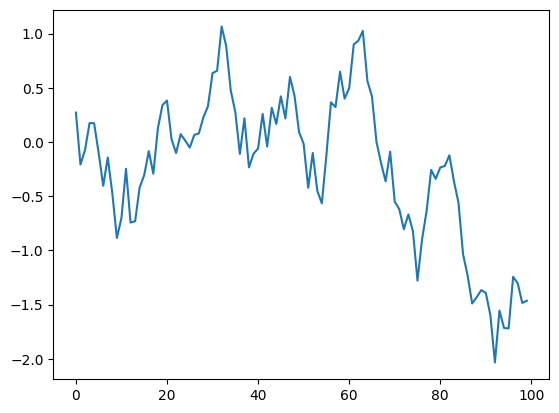

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)
y = np.cumsum(np.random.rand(100) - 0.5)
plt.plot(y)

In [ ]:



# plt.plot(y)
# plt.plot(z)

## Final Exercise (Post Lecture)

Implement the [Conway's game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) using numpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#随机生成100*100的01矩阵
np.random.seed(0)
a = np.random.randint(0, 2, size=(100, 100))

#Conway's Game of Life迭代过程
def ConwayStep(a):
    #填充边界
    padded = np.pad(a, 1, mode='constant', constant_values=0)

    #计算邻居和
    neighbor_sum = (padded[:-2, :-2] + padded[:-2, 1:-1] + padded[:-2, 2:] + padded[1:-1, :-2] +
                    padded[1:-1, 2:] + padded[2:, :-2] + padded[2:, 1:-1] + padded[2:, 2:])
    
    #存活邻居小于2或大于3则死亡
    a[(neighbor_sum < 2) | (neighbor_sum > 3)] = 0
    #存活邻居等于3则复活
    a[neighbor_sum == 3] = 1

    return a

# 可视化部分
fig, ax = plt.subplots()
im = ax.imshow(a, cmap='gray', vmin=0, vmax=1)  # 0为白色，1为黑色

def update(frame):
    ConwayStep(a)
    im.set_data(a)
    return [im]

ani = FuncAnimation(fig, update, frames=100, interval=200, blit=True)
ani.save('conway_game_of_life.gif', writer='pillow')
plt.show()

Note: you may need to restart the kernel to use updated packages.


RuntimeError: 'widget' is not a recognised GUI loop or backend name